In [675]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm 
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [625]:
df = pd.read_csv("combined_index.csv")

In [626]:
df['date'] = pd.to_datetime(df['date'])
df=df.iloc[::-1]
df

,Unnamed: 0,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,negative,...,onVentilatorCurrently,positive,positiveIncrease,states,totalTestResults,totalTestResultsIncrease,comment_created_time,scare_index,death_rate,label
385,385,2020-02-12,0.0,0,NaN,NaN,0,NaN,NaN,NaN,...,NaN,5.0,0,5,21,1,2020-02-12,0.218600,0.000000,0.0
384,384,2020-02-13,0.0,0,NaN,NaN,0,NaN,NaN,NaN,...,NaN,6.0,1,5,22,1,2020-02-13,0.276556,0.000000,0.0
383,383,2020-02-18,0.0,0,NaN,NaN,0,NaN,NaN,NaN,...,NaN,7.0,0,6,29,0,2020-02-18,0.164576,0.000000,0.0
382,382,2020-02-19,0.0,0,NaN,NaN,0,NaN,NaN,NaN,...,NaN,7.0,0,6,35,6,2020-02-19,0.201971,0.000000,0.0
381,381,2020-02-20,0.0,0,NaN,NaN,0,NaN,NaN,NaN,...,NaN,7.0,0,6,36,1,2020-02-20,0.201854,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,4,2021-03-03,508665.0,2449,45214.0,9359.0,2172,45462.0,873073.0,73857281.0,...,3094.0,28520365.0,66836,56,357888671,1406795,2021-03-03,0.124867,0.017835,0.0
3,3,2021-03-04,510408.0,1743,45293.0,8970.0,1530,44172.0,874603.0,74035238.0,...,2973.0,28585852.0,65487,56,359479655,1590984,2021-03-04,0.161954,0.017855,0.0
2,2,2021-03-05,512629.0,2221,45373.0,8634.0,2781,42541.0,877384.0,74307155.0,...,2889.0,28654639.0,68787,56,361224072,1744417,2021-03-05,0.171648,0.017890,0.0
1,1,2021-03-06,514309.0,1680,45453.0,8409.0,503,41401.0,877887.0,74450990.0,...,2811.0,28714654.0,60015,56,362655064,1430992,2021-03-06,0.177171,0.017911,0.0


In [627]:
t=df[["date","death","deathIncrease","inIcuCumulative","inIcuCurrently","hospitalizedIncrease","hospitalizedCurrently","hospitalizedCumulative","onVentilatorCurrently","onVentilatorCumulative","positive","death_rate","scare_index"]]
t

,date,death,deathIncrease,inIcuCumulative,inIcuCurrently,hospitalizedIncrease,hospitalizedCurrently,hospitalizedCumulative,onVentilatorCurrently,onVentilatorCumulative,positive,death_rate,scare_index
385,2020-02-12,0.0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,5.0,0.000000,0.218600
384,2020-02-13,0.0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,6.0,0.000000,0.276556
383,2020-02-18,0.0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,7.0,0.000000,0.164576
382,2020-02-19,0.0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,7.0,0.000000,0.201971
381,2020-02-20,0.0,0,NaN,NaN,0,NaN,NaN,NaN,NaN,7.0,0.000000,0.201854
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-03-03,508665.0,2449,45214.0,9359.0,2172,45462.0,873073.0,3094.0,4260.0,28520365.0,0.017835,0.124867
3,2021-03-04,510408.0,1743,45293.0,8970.0,1530,44172.0,874603.0,2973.0,4267.0,28585852.0,0.017855,0.161954
2,2021-03-05,512629.0,2221,45373.0,8634.0,2781,42541.0,877384.0,2889.0,4275.0,28654639.0,0.017890,0.171648
1,2021-03-06,514309.0,1680,45453.0,8409.0,503,41401.0,877887.0,2811.0,4280.0,28714654.0,0.017911,0.177171


In [628]:
temp1=df[["date","death","deathIncrease","inIcuCurrently","hospitalizedIncrease","onVentilatorCurrently","positive","death_rate","scare_index"]]

In [629]:
average_scare_index= temp1["scare_index"].mean()

In [630]:
##calculate whether the daily scare index is above the average degree
temp1["label1"]=np.nan

<ipython-input-630-2487461cbf46>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1["label1"]=np.nan


In [631]:
for i in range(temp1.shape[0]):
    if temp1["scare_index"][i] >average_scare_index:
        temp1["label1"][i]= 1
    else:
        temp1["label1"][i]=0

<ipython-input-631-f8c5c268cdd0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1["label1"][i]=0
/Users/huaxinjin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3418: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-631-f8c5c268cdd0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1["label1"][i]= 1


In [632]:
temp1=temp1.fillna(0)

normlized data
$$z_{i} = \frac{x_{i}-min(x)}{max(x)-min(x)}$$

In [633]:
def scale_data(x,y):
    d_min = y.min()
    d_max = y.max()
    return (x- d_min)/(d_max-d_min)

In [634]:
temp1['scale_death']=list(map(lambda x: scale_data(x,temp1["death"]), temp1['death']))
temp1['scale_deathIncrease']=list(map(lambda x: scale_data(x,temp1["deathIncrease"]), temp1['deathIncrease']))
temp1['scale_inIcuCurrently']=list(map(lambda x: scale_data(x,temp1["inIcuCurrently"]), temp1['inIcuCurrently']))
temp1['scale_hospitalizedIncrease']=list(map(lambda x: scale_data(x,temp1["hospitalizedIncrease"]), temp1['hospitalizedIncrease']))
temp1['scale_onVentilatorCurrently']=list(map(lambda x: scale_data(x,temp1["onVentilatorCurrently"]), temp1['onVentilatorCurrently']))
temp1['scale_positive']=list(map(lambda x: scale_data(x,temp1["positive"]), temp1['positive']))
temp1['scale_death_rate']=temp1['death_rate']


In [635]:
temp1

,date,death,deathIncrease,inIcuCurrently,hospitalizedIncrease,onVentilatorCurrently,positive,death_rate,scare_index,label1,scale_death,scale_deathIncrease,scale_inIcuCurrently,scale_hospitalizedIncrease,scale_onVentilatorCurrently,scale_positive,scale_death_rate
385,2020-02-12,0.0,0,0.0,0,0.0,5.0,0.000000,0.218600,1.0,0.000000,0.000000,0.000000,0.141786,0.000000,0.000000e+00,0.000000
384,2020-02-13,0.0,0,0.0,0,0.0,6.0,0.000000,0.276556,1.0,0.000000,0.000000,0.000000,0.141786,0.000000,3.477513e-08,0.000000
383,2020-02-18,0.0,0,0.0,0,0.0,7.0,0.000000,0.164576,1.0,0.000000,0.000000,0.000000,0.141786,0.000000,6.955027e-08,0.000000
382,2020-02-19,0.0,0,0.0,0,0.0,7.0,0.000000,0.201971,1.0,0.000000,0.000000,0.000000,0.141786,0.000000,6.955027e-08,0.000000
381,2020-02-20,0.0,0,0.0,0,0.0,7.0,0.000000,0.201854,1.0,0.000000,0.000000,0.000000,0.141786,0.000000,6.955027e-08,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2021-03-03,508665.0,2449,9359.0,2172,3094.0,28520365.0,0.017835,0.124867,0.0,0.987415,0.451262,0.391393,0.249615,0.386557,9.917994e-01,0.017835
3,2021-03-04,510408.0,1743,8970.0,1530,2973.0,28585852.0,0.017855,0.161954,1.0,0.990799,0.321172,0.375125,0.217743,0.371439,9.940767e-01,0.017855
2,2021-03-05,512629.0,2221,8634.0,2781,2889.0,28654639.0,0.017890,0.171648,1.0,0.995110,0.409250,0.361074,0.279849,0.360945,9.964688e-01,0.017890
1,2021-03-06,514309.0,1680,8409.0,503,2811.0,28714654.0,0.017911,0.177171,1.0,0.998371,0.309563,0.351664,0.166758,0.351199,9.985558e-01,0.017911


# classification model

In [682]:
#knn with scale data
x= temp1.iloc[:,10:].values
y= temp1.iloc[:,9].values
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=666)
knn_classifier=KNeighborsClassifier(8)
knn_classifier.fit(x_train,y_train)
y_predict=knn_classifier.predict(x_test)
scores=knn_classifier.score(x_test,y_test)
y_predict=y_predict.reshape(-1,1)
print(accuracy_score(y_test,y_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

0.6025641025641025
Root Mean Squared Error: 0.6304251719561152


Text(0.5, 1.0, 'KNN - Train&Test RMSE for Different Choices of K neighbours')

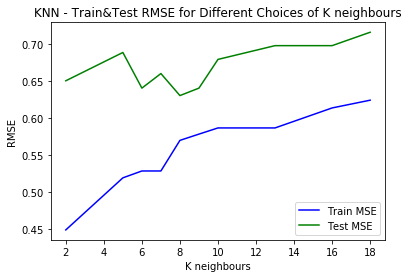

In [685]:
n=[2,5,6,7,8,9,10,13,16,18]
train_mse = []
test_mse=[]
for i in n:
    knn_classifier=KNeighborsClassifier(i)
    #Test:
    knn_classifier.fit(x_train,y_train)
    y_predict=knn_classifier.predict(x_test)
    #scores=knn_classifier.score(x_test,y_test)
    y_predict=y_predict.reshape(-1,1)
    mse1 =  np.sqrt(mean_squared_error(y_test, y_predict))
    test_mse.append(mse1)
    #Train
    y_predict_1 = knn_classifier.predict(x_train)
    mse2 =  np.sqrt(mean_squared_error(y_train, y_predict_1))
    train_mse.append(mse2)
#plt.yscale("linear")
plt.plot(n,train_mse,c='blue',label = "Train MSE")
plt.plot(n,test_mse,c='green',label = "Test MSE")
plt.legend(loc = "lower right")
plt.xlabel("K neighbours")
plt.ylabel("RMSE")
plt.title("KNN - Train&Test RMSE for Different Choices of K neighbours")

In [686]:
#knn without scale data
x= temp1.iloc[:,1:8].values
y= temp1.iloc[:,9].values

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=666)
knn_classifier=KNeighborsClassifier(8)
knn_classifier.fit(x_train,y_train)
y_predict=knn_classifier.predict(x_test)
scores=knn_classifier.score(x_test,y_test)
#print(sum(y_predict==y_test)/len(y_test))
#print(y_test)
y_predict=y_predict.reshape(-1,1)
print(accuracy_score(y_test,y_predict))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_predict)))

0.5384615384615384
Root Mean Squared Error: 0.6793662204867574


Text(0.5, 1.0, 'KNN - Train&Test RMSE for Different Choices of K neighbours')

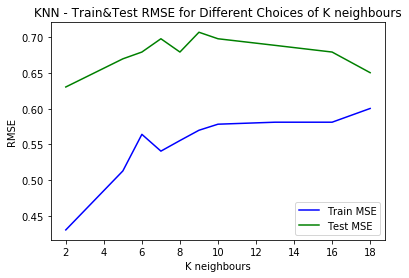

In [689]:
n=[2,5,6,7,8,9,10,13,16,18]
train_mse = []
test_mse=[]
for i in n:
    knn_classifier=KNeighborsClassifier(i)
    #Test:
    knn_classifier.fit(x_train,y_train)
    y_predict=knn_classifier.predict(x_test)
    #scores=knn_classifier.score(x_test,y_test)
    y_predict=y_predict.reshape(-1,1)
    mse1 =  np.sqrt(mean_squared_error(y_test, y_predict))
    test_mse.append(mse1)
    #Train
    y_predict_1 = knn_classifier.predict(x_train)
    mse2 =  np.sqrt(mean_squared_error(y_train, y_predict_1))
    train_mse.append(mse2)
#plt.yscale("linear")
plt.plot(n,train_mse,c='blue',label = "Train MSE")
plt.plot(n,test_mse,c='green',label = "Test MSE")
plt.legend(loc = "lower right")
plt.xlabel("K neighbours")
plt.ylabel("RMSE")
plt.title("KNN - Train&Test RMSE for Different Choices of K neighbours")

In [661]:
#decision tree
from sklearn import tree
x= temp1.iloc[:,1:8].values
y= temp1.iloc[:,9].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=444)
clf=tree.DecisionTreeClassifier(min_samples_split=2)
clf=clf.fit(x_train,y_train)
#y_predict=knn_classifier.predict(x_test)
scores=clf.score(x_test,y_test)
y_predict=clf.predict(x_test)
print(sum(y_predict==y_test)/len(y_test))


0.5512820512820513


In [664]:
mean_squared_error(y_test,y_predict)

0.44871794871794873

In [663]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
import math
clf2 = RandomForestClassifier(n_estimators=10,max_features=math.sqrt(7), max_depth=None,min_samples_split=2, bootstrap=True)
clf2=clf.fit(x_train,y_train)
scores=clf2.score(x_test,y_test)
print(scores)

0.5769230769230769


In [665]:
y_predict=clf2.predict(x_test)

In [667]:
mean_squared_error(y_test,y_predict)

0.4230769230769231